## The plan: 

- pull tweets from web using API query
- extract topic
    - naïve approach: define a set of proper nouns related to the impeachment inquiry, search for matches
- use nltk to get sentiment (?)
- search some news aggregator (AP?) for coverage on that topicq

In [4]:
"""let's start with the requests API"""

import requests

r=requests.get('https://api.github.com/events')

In [5]:
head, *tail = r.json()
head

{'id': '10984329332',
 'type': 'IssuesEvent',
 'actor': {'id': 83672,
  'login': 'matevz',
  'display_login': 'matevz',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/matevz',
  'avatar_url': 'https://avatars.githubusercontent.com/u/83672?'},
 'repo': {'id': 196697445,
  'name': 'canorusmusic/canorus',
  'url': 'https://api.github.com/repos/canorusmusic/canorus'},
 'payload': {'action': 'closed',
  'issue': {'url': 'https://api.github.com/repos/canorusmusic/canorus/issues/110',
   'repository_url': 'https://api.github.com/repos/canorusmusic/canorus',
   'labels_url': 'https://api.github.com/repos/canorusmusic/canorus/issues/110/labels{/name}',
   'comments_url': 'https://api.github.com/repos/canorusmusic/canorus/issues/110/comments',
   'events_url': 'https://api.github.com/repos/canorusmusic/canorus/issues/110/events',
   'html_url': 'https://github.com/canorusmusic/canorus/issues/110',
   'id': 530782711,
   'node_id': 'MDU6SXNzdWU1MzA3ODI3MTE=',
   'number': 110,
   'ti

In [9]:
# that was easy

In [4]:
# now with twitter ...? may need authentication here.

r = requests.get("https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=realdonaldtrump&count=2")

In [6]:
r.json()

{'errors': [{'code': 215, 'message': 'Bad Authentication data.'}]}

In [11]:
# Yeah, okay. Applied for a Twitter developer account. Please hold....

In [13]:
"""
Okay, let's get authenticated.
Following the steps here: 
https://requests-oauthlib.readthedocs.io/en/latest/oauth2_workflow.html#backend-application-flow
"""
!pip install requests_oauthlib, oauthlib.oauth2

In [6]:
from requests_oauthlib import OAuth2Session

In [7]:
from oauthlib.oauth2 import BackendApplicationClient

In [9]:
client_id = "ZqT9qiED8ogLYdVLpK2nxVoCW"
client_secret = "3skyBKuf9RJndvfcszRmKWZaRuNsxHAxpDQeKws4a2Il9B1w3S"
client = BackendApplicationClient(client_id=client_id)

In [10]:
oauth = OAuth2Session(client=client)

In [11]:
token = oauth.fetch_token(token_url='https://api.twitter.com/oauth2/token', client_id=client_id,
        client_secret=client_secret)

In [74]:
r = oauth.get("https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=realdonaldtrump&count=2")

In [75]:
r.json()[0]

{'created_at': 'Sun Dec 01 18:31:40 +0000 2019',
 'id': 1201207251035467776,
 'id_str': '1201207251035467776',
 'text': '....in America, community by community where we will eradicate AIDS in 10 years, program already started. American… https://t.co/LIRb5EfGWb',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/LIRb5EfGWb',
    'expanded_url': 'https://twitter.com/i/web/status/1201207251035467776',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [116, 139]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': 1201207249953263617,
 'in_reply_to_status_id_str': '1201207249953263617',
 'in_reply_to_user_id': 25073877,
 'in_reply_to_user_id_str': '25073877',
 'in_reply_to_screen_name': 'realDonaldTrump',
 'user': {'id': 25073877,
  'id_str': '25073877',
  'name': 'Donald J. Trump',
  'screen_name': 'realDonaldTrump',
  'location'

In [18]:
# let's deal with this truncated-text thing...
# resource: https://stackoverflow.com/questions/38717816/twitter-api-text-field-value-is-truncated

params = {'tweet_mode' : 'extended'}
r2 = oauth.get("https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=realdonaldtrump&count=10", params=params)

In [20]:
for r in r2.json() :
    print (r['full_text'])

....in America, community by community where we will eradicate AIDS in 10 years, program already started. American leadership has proven that together we can save lives.
On World AIDS Day, The First Lady and I express our support for those living with HIV/AIDS and mourn the lives lost. We reaffirm our commitment to end the HIV/AIDS epidemic....
“Schiff’s impeachment hearings wasting time when Congress must do real work” https://t.co/4lb9bWrVRL
“Trump did nothing impeachable, day-by-day review of all impeachment hearing testimony shows” @GreggJarrett https://t.co/QbFeEmWkTB
“Sen. Tim Scott Says Trump 'Innocent,' 'No Way' Senate Convicts” https://t.co/P6ONkI8n0P
RT @WhiteHouse: "The men and women of our military are totally loyal to our country. And every day I am President, America will always be t…
RT @GOPChairwoman: Just 8 work days left on Congress' calendar this year.

Instead of attacking @realDonaldTrump, Pelosi should work across…
An incredible experience! https://t.co/n6BNQY6dIx

In [76]:
r2.json()[1]

{'created_at': 'Sun Dec 01 18:31:40 +0000 2019',
 'id': 1201207249953263617,
 'id_str': '1201207249953263617',
 'full_text': 'On World AIDS Day, The First Lady and I express our support for those living with HIV/AIDS and mourn the lives lost. We reaffirm our commitment to end the HIV/AIDS epidemic....',
 'truncated': False,
 'display_text_range': [0, 176],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 25073877,
  'id_str': '25073877',
  'name': 'Donald J. Trump',
  'screen_name': 'realDonaldTrump',
  'location': 'Washington, DC',
  'description': '45th President of the United States of America🇺🇸',
  'url': 'https://t.co/OMxB0x7xC5',
  'entities': {'url': {'urls': [{'url': 'https:

In [24]:
! pip install tweepy

In [26]:
! pip install textblob

    100% |████████████████████████████████| 645kB 767kB/s ta 0:00:01


In [28]:
! pip install preprocessor

  Running setup.py bdist_wheel for preprocessor ... done
  Stored in directory: /Users/ryanglassman/Library/Caches/pip/wheels/98/c1/a2/21fbcfd80d76576bbf148991a66f00730f541f265c7600000f
Successfully built preprocessor


In [29]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p

In [30]:
#Twitter credentials for the app
consumer_key = client_id
consumer_secret = client_secret
access_key= '3343168235-39yNUvXmStC59DxI1rDXUGYvukbnX3xV9qYiB5p'
access_secret = '3ynInkKMBBbaBatHyq5UgqQEwfbq1jPZh2xUMpvxFC7Ar'

In [32]:
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [128]:
cheeto = tweepy.Cursor(api.user_timeline, id='realdonaldtrump', tweet_mode='extended').items(500)

In [127]:

for x in cheeto : 
    print(x.full_text)

RT @PressSec: Well said. There is so much work left do be done. Let’s move past this impeachment farce, follow the lead of @realDonaldTrump…
https://t.co/AUoFQexhR4
RT @SBAgov: #DidYouKnow small businesses create 2 out of every 3 net new jobs in the United States? 😮

Show your support for entrepreneurs…
Just returned to the United States after spending a GREAT Thanksgiving with our Courageous American Warriors in Afghanistan! https://t.co/b2vgY5BH6z
RT @DiamondandSilk: .@DiamondandSilk talk about their experience at the Black Voices For Trump event along with the Itch of the week that n…
I thought Newsweek was out of business? https://t.co/3ro4eSJloo
HAPPY THANKSGIVING! https://t.co/7SGZnHindW
RT @GOPChairwoman: Thank you for your sacrifice and service!
https://t.co/dBj2wIgI2U
RT @WhiteHouse: This Thanksgiving, we are thankful to all who wear our Nation's uniform, allowing us to celebrate in safety and peace. http…
HAPPY THANKSGIVING! https://t.co/2GoxJEk6fN
RT @WhiteHouse: "THEREFORE,

RT @WayneDupreeShow: This whole Ukraine thing is about to blow up in Dems face so big time.

https://t.co/D668vbxzUA
RT @PeteHegseth: Huge CONGRATS to new mom @JedediahBila &amp; hubby Jeremy! Welcome baby Hartley to the @foxandfriends family. So glad all is w…
RT @BuckSexton: Simply mind boggling that here we are, heading into year 4 of the Trump presidency, in a time of tremendous American econom…
RT @BuckSexton: Russia invaded eastern Ukraine,  picked off Crimea, and shot an airliner out of the sky killing hundreds of civilians *WHIL…
RT @DonaldJTrumpJr: For perspective THIS X 1000!!! 
Wonder why? https://t.co/Juz7piWvCH
RT @BuckSexton: Be prepared for bureaucrats at FBI to claim sheer incompetence as their defense to whatever comes out of the Horowitz probe…
RT @BuckSexton: People need to stop making Democrats look like a bunch of crazy Left wing extremists by quoting them and sharing their offi…
RT @ByronYork: NPR reviews new Glenn Simpson book. Says Steele dossier 'found its way 

RT @seanhannity: .@realDonaldTrump: "It’s a hoax. It’s a disgrace. It’s an embarrassment to our country. Nancy Pelosi has done a terrible j…
RT @JesseBWatters: The hoax is OVER. It's done. They tried and failed. They didn't have one witness to testify that President @realdonaldtr…
RT @GeraldoRivera: Re #CollusionHoax it’s not @realDonaldTrump denying #Russia interfered w our 2016 election. It’s Democrats &amp; house media…
RT @parscale: Adam Schiff is running the Democrat sham impeachment but now it’s time you got your say!

BULL-SCHIFF!

Get your 100% cotton…
RT @TeamTrump: In 2016, President @realDonaldTrump asked African Americans, “What do you have to lose?”

In 2020, it is now “imagine all th…
RT @GOPChairwoman: House Democrats have been trying to invalidate the will of the American people since Day 1.
 
We won’t let them take awa…
RT @GeraldoRivera: And so it begins. If #CNN exclusive is confirmed, big trouble at the #FBI Allegation according to @evanperez their excel…
RT @TeamTr

....”I WANT NOTHING! I WANT NOTHING! I WANT NO QUID PRO QUO! TELL PRESIDENT ZELENSKY TO DO THE RIGHT THING!” Later, Ambassador Sondland said that I told him, “Good, go tell the truth!” This Witch Hunt must end NOW. So bad for our Country!
Impeachment Witch Hunt is now OVER! Ambassador Sondland asks U.S. President (me): “What do you want from Ukraine? I keep hearing all these different ideas &amp; theories. What do you want? It was a very abrupt conversation. He was not in a good mood. He (the President) just said,”...
RT @WhiteHouse: President @realDonaldTrump delivers a statement on the sham impeachment process: https://t.co/XBoUNfRV4a
We join families of Kevin King &amp; Tim Weeks in celebrating their release from Taliban captivity. Thanks to President Ghani for his courageous support. Let’s hope this leads to more good things on the peace front like a ceasefire that will help end this long war. Proud of my team!
https://t.co/HbgEgZsPZ9
RT @RNCResearch: Sondland agrees the president 

KeyboardInterrupt: 

In [77]:
! pip install wordcloud

    100% |████████████████████████████████| 163kB 893kB/s ta 0:00:01


In [140]:
cheeto2 = oauth.get("https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=realdonaldtrump&count=500", params={'tweet_mode' : 'extended'})

In [145]:
for tweet in cheeto2.json() :
    if not "RT @" in tweet['full_text'] :
        print(tweet['full_text'])

....in America, community by community where we will eradicate AIDS in 10 years, program already started. American leadership has proven that together we can save lives.
On World AIDS Day, The First Lady and I express our support for those living with HIV/AIDS and mourn the lives lost. We reaffirm our commitment to end the HIV/AIDS epidemic....
“Schiff’s impeachment hearings wasting time when Congress must do real work” https://t.co/4lb9bWrVRL
“Trump did nothing impeachable, day-by-day review of all impeachment hearing testimony shows” @GreggJarrett https://t.co/QbFeEmWkTB
“Sen. Tim Scott Says Trump 'Innocent,' 'No Way' Senate Convicts” https://t.co/P6ONkI8n0P
An incredible experience! https://t.co/n6BNQY6dIx
Nancy Pelosi won’t put it up for a vote. Has delayed it for 6 months. See you in #2020! https://t.co/lOrWm9u10r
I will be representing our Country in London at NATO, while the Democrats are holding the most ridiculous Impeachment hearings in history. Read the Transcripts, NOTHING 

In [146]:
text = " ".join([re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet['full_text']) 
                 for tweet in cheeto2.json() 
                    if "RT @" not in tweet['full_text']])

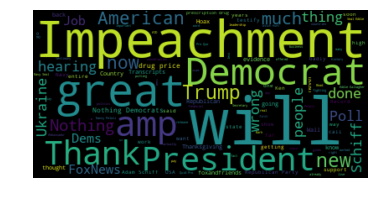

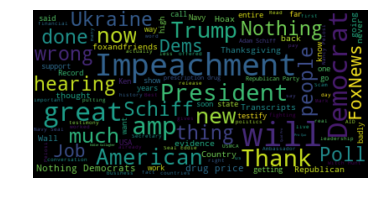

In [147]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()